In [2]:
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of data
#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [3]:
df= pd.read_csv('main_dataset.csv')

In [4]:
df

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.6,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.5,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...
32576,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Elementary Korean Workbook,Insun Lee,Paperback,4.0,15.52,$,18.0,9780804845021,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000985.jpg
32577,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Lonely Planet Best of Peru,Lonely Planet,Paperback,4.0,14.26,$,21.1,9781786571267,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000986.jpg
32578,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Complete Finnish Beginner to Intermediate Cour...,Terttu Leney,Paperback,4.5,43.12,$,48.5,9781444195224,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000987.jpg
32579,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Simple Thai Food,Leela Punyaratabandhu,Hardback,4.0,20.84,$,23.0,9781607745235,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000988.jpg


In [4]:
def show_image_from_url(image_url):

  """
  Fetches image online from the image_url and plots it as it is using matplotlib's pyplot's image show
  """

  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb), plt.axis('off')

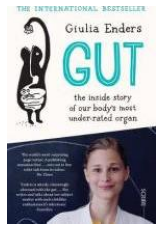

In [5]:
plt.figure()
show_image_from_url(df['image'].loc[10])

In [6]:
df

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.6,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.5,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg
...,...,...,...,...,...,...,...,...,...,...,...
32576,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Elementary Korean Workbook,Insun Lee,Paperback,4.0,15.52,$,18.0,9780804845021,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000985.jpg
32577,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Lonely Planet Best of Peru,Lonely Planet,Paperback,4.0,14.26,$,21.1,9781786571267,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000986.jpg
32578,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Complete Finnish Beginner to Intermediate Cour...,Terttu Leney,Paperback,4.5,43.12,$,48.5,9781444195224,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000987.jpg
32579,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Simple Thai Food,Leela Punyaratabandhu,Hardback,4.0,20.84,$,23.0,9781607745235,Travel-Holiday-Guides,dataset/Travel-Holiday-Guides/0000988.jpg


In [7]:
print('All categories : \n ', df['category'].unique())

All categories : 
  ['Medical' 'Science-Geography' 'Art-Photography' 'Biography'
 'Business-Finance-Law' 'Childrens-Books' 'Computing' 'Crafts-Hobbies'
 'Crime-Thriller' 'Dictionaries-Languages' 'Entertainment' 'Food-Drink'
 'Graphic-Novels-Anime-Manga' 'Health' 'History-Archaeology' 'Home-Garden'
 'Humour' 'Mind-Body-Spirit' 'Natural-History' 'Personal-Development'
 'Poetry-Drama' 'Reference' 'Religion' 'Romance'
 'Science-Fiction-Fantasy-Horror' 'Society-Social-Sciences' 'Sport'
 'Stationery' 'Teaching-Resources-Education' 'Technology-Engineering'
 'Teen-Young-Adult' 'Transport' 'Travel-Holiday-Guides']


# load image from url 

In [8]:
def image_processing(image_url):

    """Converts the URL of any image to an array of size 100x1 
    The array represents an OpenCV grayscale version of the original image
    The image will get cropped along the biggest red contour (4 line polygon) tagged on the original image (if any)
    """

    #Download from image url and import it as a numpy array
    response = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")                         

    #Read the numpy arrays as color images in OpenCV
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)

    #Convert to HSV for creating a mask
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    #Convert to grayscale that will actually be used for training, instead of color image 
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    #Create a mask that detects the red rectangular tags present in each image
    mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

    #Get the coordinates of the red rectangle in the image, 
    #But take entire image if mask fails to detect the red rectangle
    if len(np.where(mask != 0)[0]) != 0:
        y1 = min(np.where(mask != 0)[0])
        y2 = max(np.where(mask != 0)[0])
    else:
        y1 = 0                                     
        y2 = len(mask)

    if len(np.where(mask != 0)[1]) != 0:
        x1 = min(np.where(mask != 0)[1])
        x2 = max(np.where(mask != 0)[1])
    else:
        x1 = 0
        x2 = len(mask[0])

    #Crop the grayscle image along those coordinates
    image_cropped = image_gray[y1:y2, x1:x2]
    if image_cropped.size ==0:
        print(image_url)
        return image_cropped
    else:
    #Resize the image to 100x100 pixels size
        image_100x100 = cv2.resize(image_cropped, (100, 100))

    #Save image as in form of array of 10000x1
        image_arr = image_100x100.flatten()

    return image_arr


In [9]:
from tqdm import tqdm
import time

In [41]:
#image_list = []

for url in tqdm(df['image'].tolist()[:]):
    image_list.append(image_processing(url))



  6%|████▉                                                                        | 573/8978 [05:22<1:29:43,  1.56it/s]

https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/5532/9780553270549.jpg


  7%|█████▏                                                                       | 607/8978 [05:40<1:24:21,  1.65it/s]

https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/5535/9780553565072.jpg


 16%|████████████▎                                                                 | 1420/8978 [10:57<18:00,  7.00it/s]

https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/3078/9780307888440.jpg


 17%|█████████████                                                                 | 1503/8978 [11:07<08:07, 15.35it/s]

https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/4402/9780440226192.jpg


 34%|█████████████████████████▍                                                  | 3009/8978 [22:55<1:27:32,  1.14it/s]

https://d1w7fb2mkkr3kw.cloudfront.net/assets/images/book/mid/9780/8988/9780898867725.jpg


100%|████████████████████████████████████████████████████████████████████████████| 8978/8978 [1:16:37<00:00,  1.95it/s]


In [60]:
X = np.array(image_list)
np.save('processed_100x100_image.npy',X/255,allow_pickle=True)

book_array = np.load('processed_100x100_image.npy',allow_pickle=True)

In [5]:
book_array = np.load('processed_100x100_image.npy',allow_pickle=True)

# remove array that do not have 10000 dimensions

In [6]:
X = []
exclude =[]
for i in range(len(book_array)):
    if book_array[i].shape == (10000,):
        X.append(book_array[i])
    else:
        exclude.append(i)
X =np.array(X)

In [7]:
X.shape

(32555, 10000)

In [8]:
df.drop(df.index[exclude],inplace=True)

In [14]:
book_array[0:3]

array([array([0.62745098, 0.62745098, 0.62352941, ..., 0.1254902 , 0.1254902 ,
       0.1254902 ]),
       array([0.96470588, 0.97647059, 0.98039216, ..., 0.98039216, 0.98039216,
       0.98039216]),
       array([0.6       , 0.6       , 0.6       , ..., 0.45882353, 0.41960784,
       0.37254902])], dtype=object)

## look at sample image 

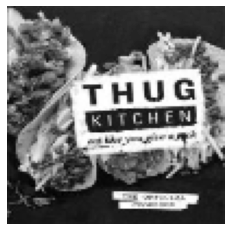

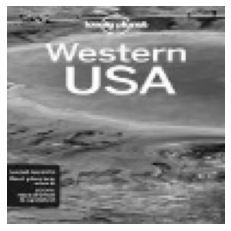

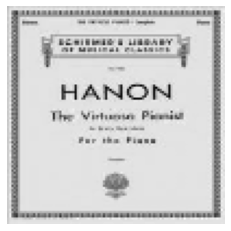

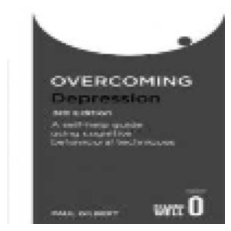

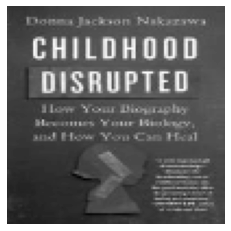

In [9]:
np.random.seed(17)
for i in np.random.randint(0, len(book_array), 5):
    plt.figure()
    plt.imshow(book_array[i].reshape(100, 100), cmap='gray'), plt.axis('off')

In [11]:
n_classes = df['book_depository_stars'].nunique()
print('Total number of unique categories:', n_classes)

Total number of unique categories: 10


In [12]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(df['book_depository_stars'])
print(Targets)
print(Targets.shape)

[8 7 8 ... 8 7 6]
(32555,)


In [13]:
Y = to_categorical(Targets, num_classes = n_classes)
print(Y[0:3])
print(Y.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(32555, 10)


In [14]:
#Segregation of a test set for testing on the trained model

X_test = X[30000:,]
Y_test = Y[30000:,]

#Seperation of a validation set from the remaing training set (required for validation while training)

X_train, X_val, Y_train, Y_val = train_test_split(X[:30000,], Y[:30000,], test_size=0.15, random_state=13)

In [15]:
X_train.shape

(25500, 10000)

In [16]:
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_val.shape

(4500, 100, 100, 1)

In [18]:
#Define a Convolutional Neural Network Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4

In [148]:
save_at = "model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

Epoch 1/15
255/255 [==============================] - 306s 1s/step - loss: 1.5963 - accuracy: 0.5003 - val_loss: 1.1993 - val_accuracy: 0.4936
Epoch 2/15
255/255 [==============================] - 310s 1s/step - loss: 1.1383 - accuracy: 0.5440 - val_loss: 1.2198 - val_accuracy: 0.5227
Epoch 3/15
255/255 [==============================] - 309s 1s/step - loss: 1.1060 - accuracy: 0.5546 - val_loss: 1.1625 - val_accuracy: 0.5200
Epoch 4/15
255/255 [==============================] - 233s 914ms/step - loss: 1.1040 - accuracy: 0.5552 - val_loss: 1.1315 - val_accuracy: 0.5649
Epoch 5/15
255/255 [==============================] - 233s 912ms/step - loss: 1.1019 - accuracy: 0.5564 - val_loss: 1.1081 - val_accuracy: 0.5658
Epoch 6/15
255/255 [==============================] - 247s 970ms/step - loss: 1.1000 - accuracy: 0.5581 - val_loss: 1.1115 - val_accuracy: 0.5662
Epoch 7/15
255/255 [==============================] - 242s 950ms/step - loss: 1.0995 - accuracy: 0.5587 - val_loss: 1.1078 - val_accu

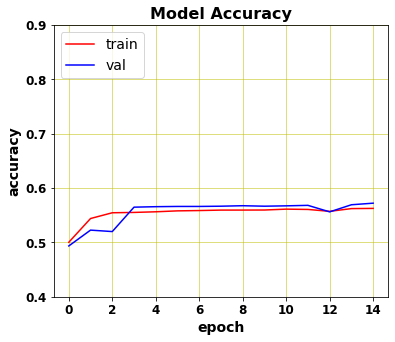

In [149]:
    #Train the CNN

history = model.fit( X_train, Y_train, 
                    epochs = 15, batch_size = 100?, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

# Plot the training history (Training accuracy & Validation accuracy)

plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.4, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [71]:
#Run model on the held-out test set

model = load_model('model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  53.74 %


In [88]:
# import classification_report
from sklearn.metrics import classification_report

pred = model.predict(X_test)

# turn a array of prediction probability to predicted value
test_predictions = np.argmax(pred, axis=-1)
Y_test_labels = np.argmax(Y_test, axis=-1)

print(classification_report(Y_test_labels,test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        49
           6       1.00      0.01      0.01       268
           7       0.54      0.99      0.70      1375
           8       0.25      0.01      0.01       662
           9       0.00      0.00      0.00        75

    accuracy                           0.54      2555
   macro avg       0.20      0.11      0.08      2555
weighted avg       0.46      0.54      0.38      2555



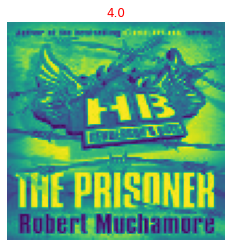

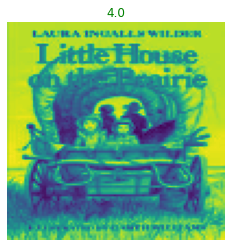

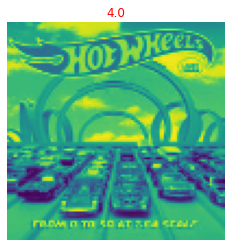

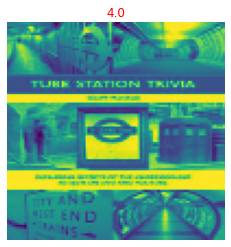

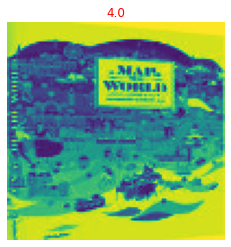

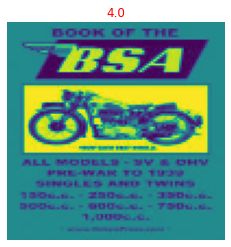

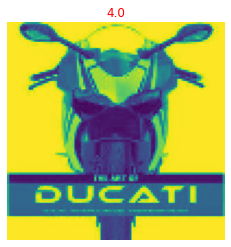

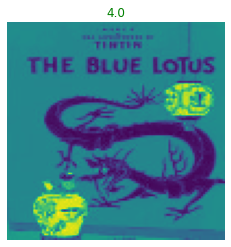

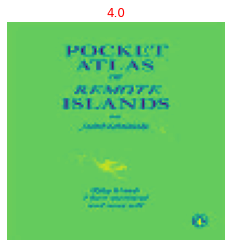

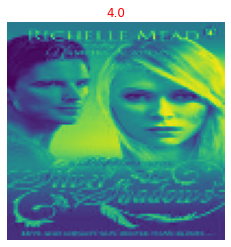

In [24]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 10):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100),cmap='gray'), plt.axis('off')
    if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
    else :
        plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

# Regression

## Clean pricing column to contain onlty number 

In [19]:
import re 

df['price'] = df.price.apply(lambda x :re.sub("[^0-9.]",'',x)).apply(float)


In [20]:
#Define a Convolutional Neural Network Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(n_classes, activation='softmax'))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)       

In [21]:
save_at = "model_regression.hdf5"
save_best2 = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [22]:
Y_price = np.array(df.price.tolist())
Y_price_train = Y_price[:len(X_train)]
Y_price_test = Y_price[30000:]
Y_price_val = Y_price[len(X_train):30000]

In [23]:
#Train the CNN

history = model.fit( X_train, Y_price_train, 
                    epochs = 15, batch_size = 100, 
                    callbacks=[save_best2], verbose=1, 
                   validation_data = (X_val, Y_price_val))

Epoch 1/15
255/255 [==============================] - 339s 1s/step - loss: 229.1906 - val_loss: 246.5607
Epoch 2/15
255/255 [==============================] - 415s 2s/step - loss: 180.7153 - val_loss: 240.7209
Epoch 3/15
255/255 [==============================] - 350s 1s/step - loss: 177.4887 - val_loss: 230.5338
Epoch 4/15
255/255 [==============================] - 345s 1s/step - loss: 173.8322 - val_loss: 217.3643
Epoch 5/15
255/255 [==============================] - 327s 1s/step - loss: 171.8561 - val_loss: 204.7530
Epoch 6/15
255/255 [==============================] - 326s 1s/step - loss: 169.8585 - val_loss: 227.3460
Epoch 7/15
255/255 [==============================] - 322s 1s/step - loss: 162.5349 - val_loss: 212.3080
Epoch 8/15
255/255 [==============================] - 330s 1s/step - loss: 158.9144 - val_loss: 188.3869
Epoch 9/15
255/255 [==============================] - 356s 1s/step - loss: 155.5157 - val_loss: 233.4360
Epoch 10/15
255/255 [==============================] - 

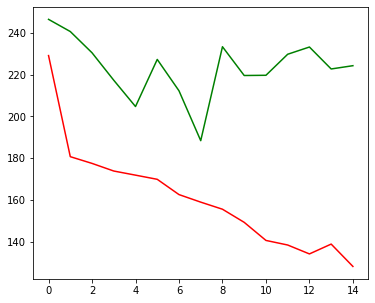

In [24]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='g')
plt.show()

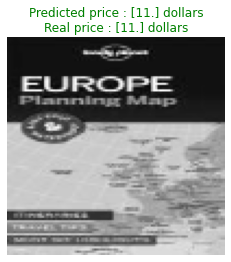

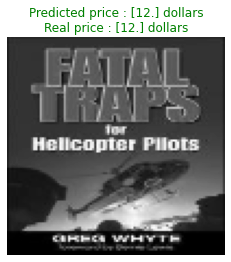

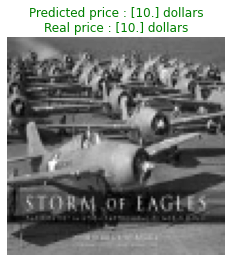

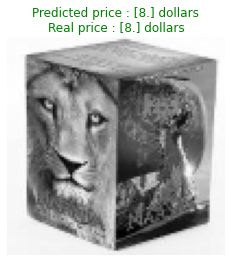

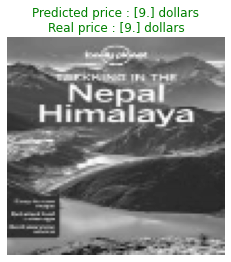

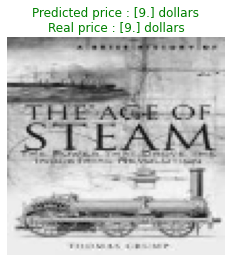

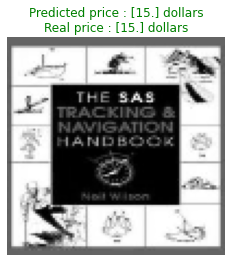

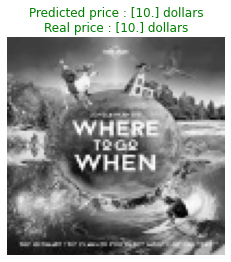

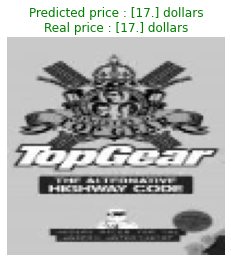

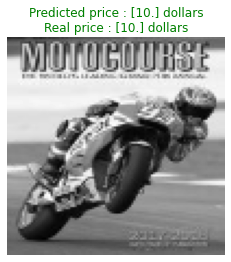

In [36]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(11)
for rand_num in np.random.randint(0, len(Y_test), 10):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(100, 100),cmap='gray'), plt.axis('off')
    plt.title('Predicted price : ' +str(Y_pred[rand_num]) +' dollars' + '\nReal price : ' +str(Y_pred[rand_num]) +' dollars' , color='g')

